In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from datetime import datetime, timedelta

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

2024-03-12 16:07:20.842048: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-12 16:07:20.868499: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-12 16:07:20.868521: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-12 16:07:20.869349: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-12 16:07:20.874119: I tensorflow/core/platform/cpu_feature_guar

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [4]:
df = pd.read_csv(csv_path)

In [5]:
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


## 1. Data Exploration

### Understand the data

In [6]:
import pandas as pd

csv_input = pd.read_csv('../data/files/dataset_trajectory.csv')
data = csv_input

In [7]:
# show head
print(data.shape)
data.head()

(932400, 6)


,pos.x,pos.y,pos.z,heading,velocity,weather
0,-77.030670,-1.283448,0.294200,-1.568362,7.056001,2
1,-77.030670,-1.283448,0.061311,-1.568362,7.172558,2
2,-77.029778,-1.283539,-0.030319,-1.568443,1.053028,2
3,-77.028854,-1.283728,-0.023681,-1.568593,0.883579,2
4,-77.008575,-1.288779,0.003869,-1.572756,1.548891,2


In [8]:
# Remove rows with any NaN values
data = data.dropna()
print(len(data))

932400


In [9]:
# show general statistics
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932400 entries, 0 to 932399
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   pos.x     932400 non-null  float64
 1   pos.y     932400 non-null  float64
 2   pos.z     932400 non-null  float64
 3   heading   932400 non-null  float64
 4   velocity  932400 non-null  float64
 5   weather   932400 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 42.7 MB


In [10]:
## Adding date time
# Start datetime
start_datetime = datetime(2009, 1, 1, 0, 0, 0)

# Generate datetime column with incrementing seconds
num_rows = len(data)
seconds_increment = timedelta(seconds=1)

date_times = [start_datetime + i * seconds_increment for i in range(num_rows)]

# Add datetime column to DataFrame
data['Date Time'] = date_times

In [11]:
# show head
print(data.shape)
data.head()

(932400, 7)


,pos.x,pos.y,pos.z,heading,velocity,weather,Date Time
0,-77.030670,-1.283448,0.294200,-1.568362,7.056001,2,2009-01-01 00:00:00
1,-77.030670,-1.283448,0.061311,-1.568362,7.172558,2,2009-01-01 00:00:01
2,-77.029778,-1.283539,-0.030319,-1.568443,1.053028,2,2009-01-01 00:00:02
3,-77.028854,-1.283728,-0.023681,-1.568593,0.883579,2,2009-01-01 00:00:03
4,-77.008575,-1.288779,0.003869,-1.572756,1.548891,2,2009-01-01 00:00:04


In [12]:
# show head
print(data.shape)
data.head(-5)

(932400, 7)


,pos.x,pos.y,pos.z,heading,velocity,weather,Date Time
0,-77.030670,-1.283448,0.294200,-1.568362,7.056001,2,2009-01-01 00:00:00
1,-77.030670,-1.283448,0.061311,-1.568362,7.172558,2,2009-01-01 00:00:01
2,-77.029778,-1.283539,-0.030319,-1.568443,1.053028,2,2009-01-01 00:00:02
3,-77.028854,-1.283728,-0.023681,-1.568593,0.883579,2,2009-01-01 00:00:03
4,-77.008575,-1.288779,0.003869,-1.572756,1.548891,2,2009-01-01 00:00:04
...,...,...,...,...,...,...,...
932390,-225.648590,-23.807150,9.988827,-0.014127,87.899653,2,2009-01-11 18:59:50
932391,-225.613998,-21.365744,9.988827,-0.014061,87.899649,2,2009-01-11 18:59:51
932392,-225.579697,-18.924328,9.988827,-0.013933,87.899627,2,2009-01-11 18:59:52
932393,-225.545715,-16.482910,9.988826,-0.013751,87.899644,2,2009-01-11 18:59:53


In [13]:
date_time = pd.to_datetime(data.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

In [14]:
data.head()

,pos.x,pos.y,pos.z,heading,velocity,weather
0,-77.030670,-1.283448,0.294200,-1.568362,7.056001,2
1,-77.030670,-1.283448,0.061311,-1.568362,7.172558,2
2,-77.029778,-1.283539,-0.030319,-1.568443,1.053028,2
3,-77.028854,-1.283728,-0.023681,-1.568593,0.883579,2
4,-77.008575,-1.288779,0.003869,-1.572756,1.548891,2


Here is the evolution of a few features over time:

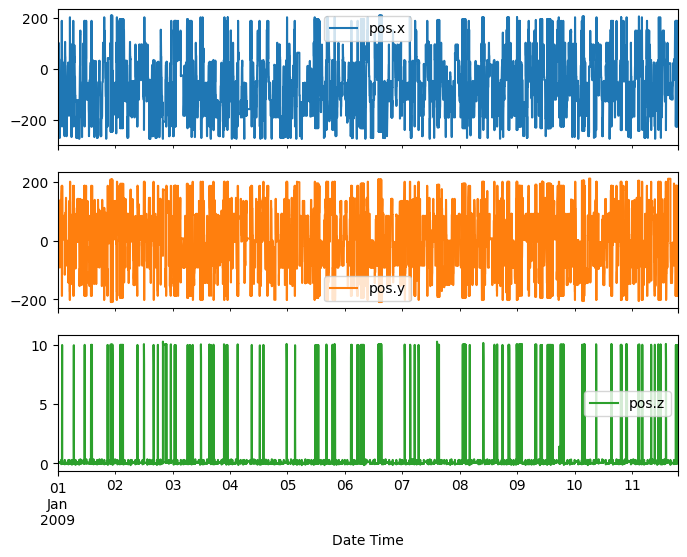

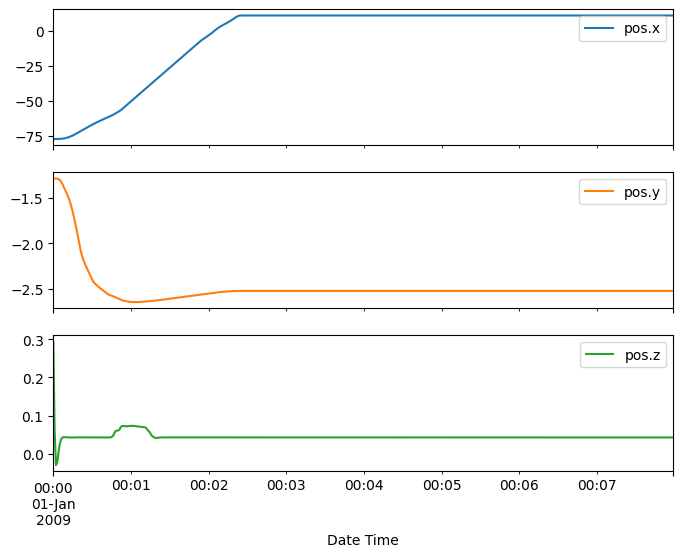

In [15]:
plot_cols = ['pos.x', 'pos.y', 'pos.z']
plot_features = data[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = data[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

Inspect and cleanup

Next, look at the statistics of the dataset:

In [16]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pos.x,932400.0,-56.103616,104.911729,-276.641449,-1.319733e+02,-51.082161,27.999519,211.047684
pos.y,932400.0,5.323090,103.192367,-209.037384,-8.447585e+01,0.694163,88.120567,211.486893
pos.z,932400.0,0.507044,2.032976,-0.147992,-5.572662e-03,0.025383,0.057299,10.300500
heading,932400.0,0.097574,1.879296,-3.141592,-1.570819e+00,0.000253,1.569901,3.141593
velocity,932400.0,15.497245,21.916628,0.000000,8.926438e-07,0.043420,28.480867,88.524232
weather,932400.0,1.888031,0.991768,0.000000,1.000000e+00,2.000000,3.000000,3.000000


### Time

The Date Time column is very useful, but not in this string form. Start by converting it to seconds:




In [17]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

In [18]:
minute = 60
hour = 60*60
day = 24*60*60
year = (365.2425)*day

data['Minute sin'] = np.sin(timestamp_s * (2 * np.pi / minute))
data['Minute cos'] = np.cos(timestamp_s * (2 * np.pi / minute))
data['Hour sin'] = np.sin(timestamp_s * (2 * np.pi / hour))
data['Hour cos'] = np.cos(timestamp_s * (2 * np.pi / hour))
data['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
data['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
data['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
data['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of Hour signal')

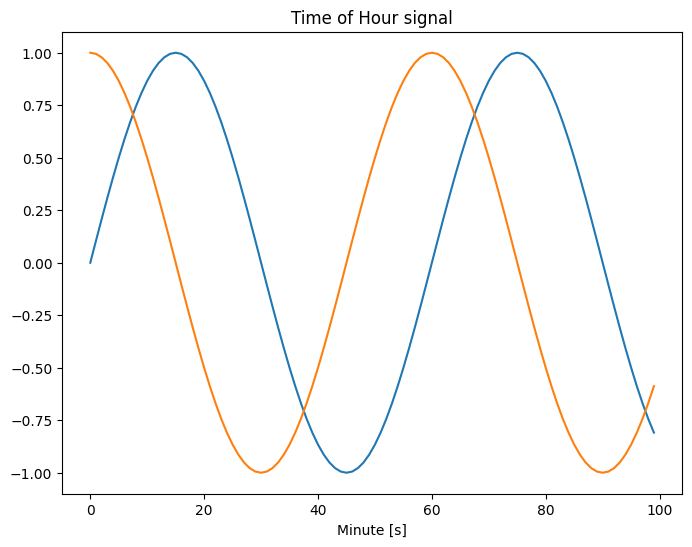

In [19]:
plt.plot(np.array(data['Minute sin'])[:100])
plt.plot(np.array(data['Minute cos'])[:100])
plt.xlabel('Minute [s]')
plt.title('Time of Hour signal')

### Split the data

You'll use a (70%, 20%, 10%) split for the training, validation, and test sets. Note the data is not being randomly shuffled before splitting. This is for two reasons:

1. It ensures that chopping the data into windows of consecutive samples is still possible.

2. It ensures that the validation/test results are more realistic, being evaluated on the data collected after the model was trained.

In [20]:
column_indices = {name: i for i, name in enumerate(data.columns)}

n = len(data)
train_df = data[0:int(n*0.7)]
val_df = data[int(n*0.7):int(n*0.9)]
test_df = data[int(n*0.9):]

num_features = data.shape[1]



In [21]:
print(num_features)
print(len(train_df))
print(len(val_df))
print(len(test_df))

14
652680
186480
93240


### Normalize the data

In [22]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

Now, peek at the distribution of the features. Some features do have long tails, but there are no obvious

/tmp/ipykernel_3039731/76593754.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(data.keys(), rotation=90)


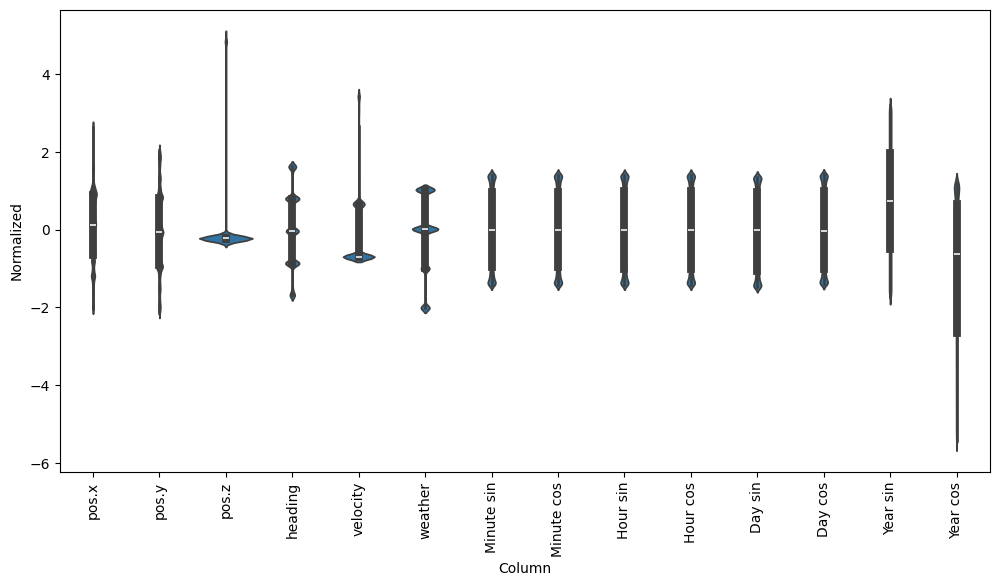

In [23]:
df_std = (data - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(data.keys(), rotation=90)

## 2. Data windowing

In [24]:
from utils import WindowGenerator

w1 = WindowGenerator(input_width=50, label_width=50, shift=50, train_df=train_df, val_df=val_df, test_df=test_df, label_columns=['pos.x', 'pos.y'])

In [25]:
w1

Total window size: 100
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
Label indices: [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]
Label column name(s): ['pos.x', 'pos.y']

In [26]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w1.total_window_size]),
                           np.array(train_df[100:100+w1.total_window_size]),
                           np.array(train_df[200:200+w1.total_window_size])])

example_inputs, example_labels = w1.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 100, 14)
Inputs shape: (3, 50, 14)
Labels shape: (3, 50, 2)


In [27]:
# Each element is an (inputs, label) pair.
w1.train.element_spec

(TensorSpec(shape=(None, 50, 14), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 50, 2), dtype=tf.float32, name=None))

## 3. Models

### Single prediction

#### Baseline model

In [28]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [29]:
baseline = Baseline(label_index=column_indices['pos.x'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(w1.val)
performance['Baseline'] = baseline.evaluate(w1.test, verbose=0)

5825/5825 [==============================] - 3s 490us/step - loss: 1.1708 - mean_absolute_error: 0.6819


In [30]:
print('Input shape:', w1.example[0].shape)
print('Output shape:', baseline(w1.example[0]).shape)

Input shape: (32, 50, 14)
Output shape: (32, 50, 1)


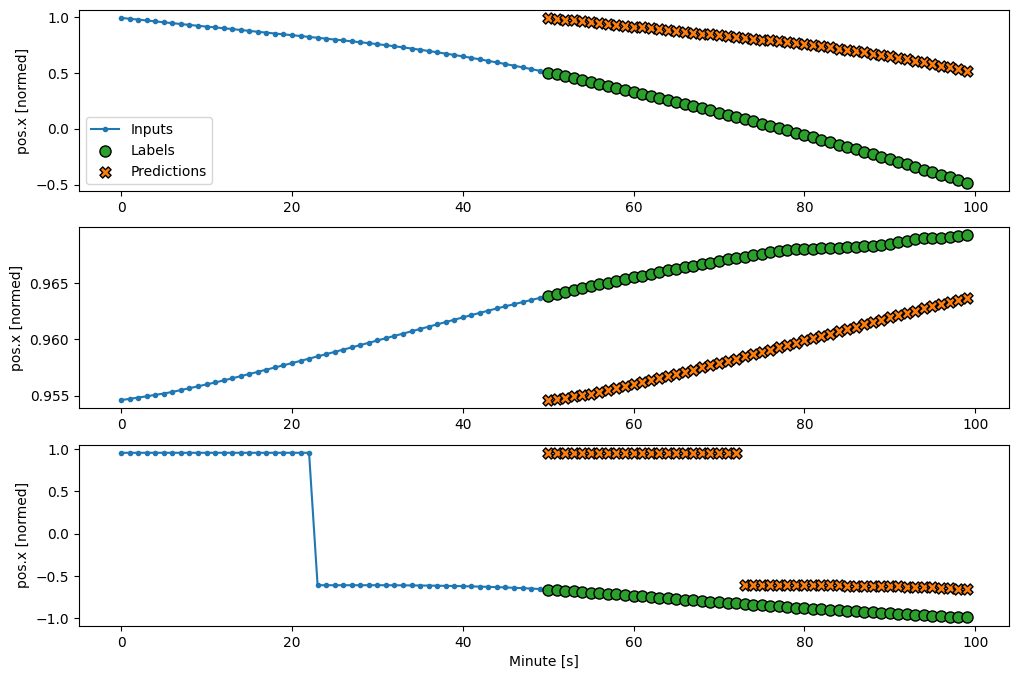

In [31]:
w1.plot(baseline)

#### Linear Model

In [32]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [33]:
print('Input shape:', w1.example[0].shape)
print('Output shape:', linear(w1.example[0]).shape)

Input shape: (32, 50, 14)
Output shape: (32, 50, 1)


In [34]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

##### Train

In [35]:
history = compile_and_fit(linear, w1)

val_performance['Linear'] = linear.evaluate(w1.val)
performance['Linear'] = linear.evaluate(w1.test, verbose=0)

Epoch 1/20
20394/20394 [==============================] - 18s 892us/step - loss: 0.5798 - mean_absolute_error: 0.6040 - val_loss: 0.5930 - val_mean_absolute_error: 0.6192
Epoch 2/20
20394/20394 [==============================] - 22s 1ms/step - loss: 0.5333 - mean_absolute_error: 0.5862 - val_loss: 0.5930 - val_mean_absolute_error: 0.6191
Epoch 3/20
20394/20394 [==============================] - 22s 1ms/step - loss: 0.5333 - mean_absolute_error: 0.5862 - val_loss: 0.5931 - val_mean_absolute_error: 0.6190
Epoch 4/20
5825/5825 [==============================] - 4s 753us/step - loss: 0.5930 - mean_absolute_error: 0.6192


In [36]:
print('Input shape:', w1.example[0].shape)
print('Output shape:', linear(w1.example[0]).shape)

Input shape: (32, 50, 14)
Output shape: (32, 50, 1)


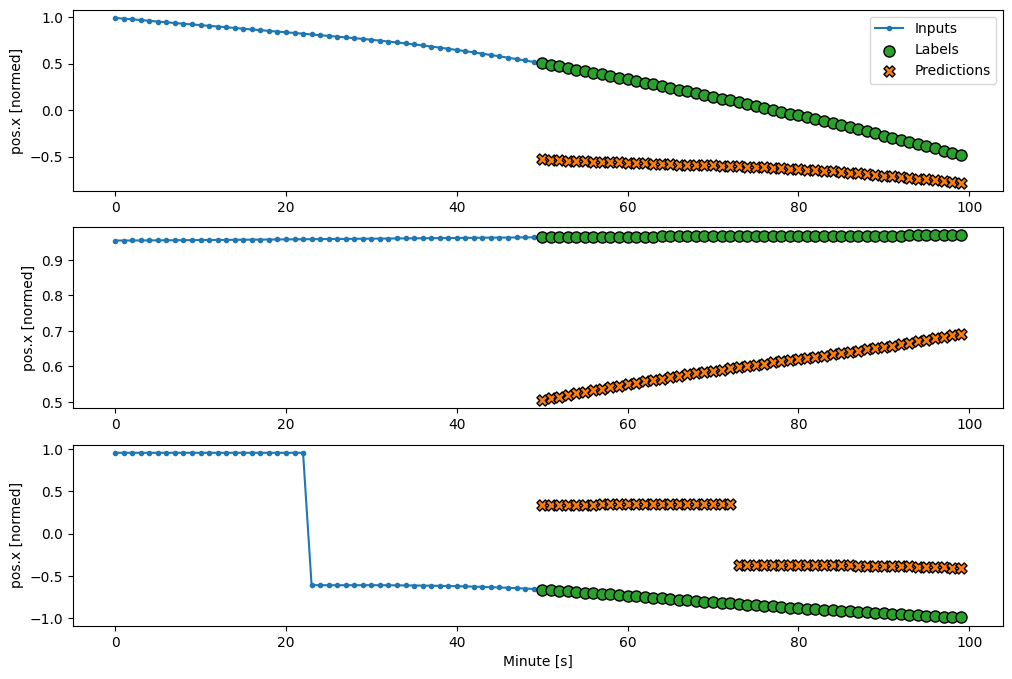

In [37]:
w1.plot(linear)

One advantage to linear models is that they're relatively simple to interpret. You can pull out the layer's weights and visualize the weight assigned to each input:

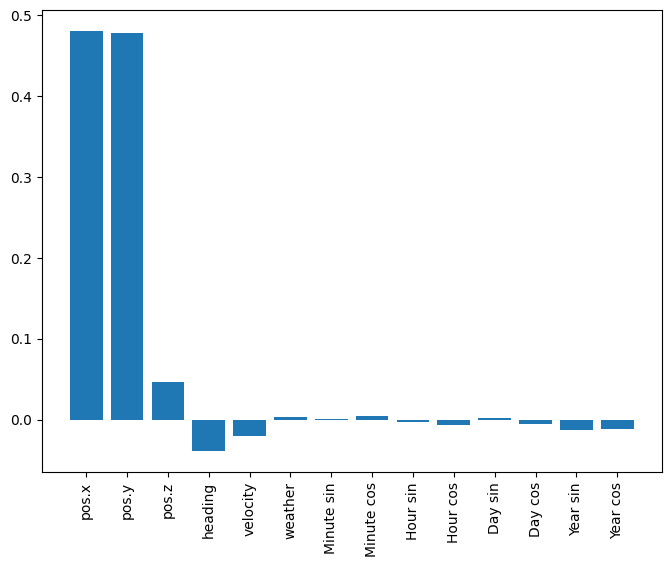

In [38]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

### Multi-output models

In [39]:
w2 = WindowGenerator(input_width=50, label_width=50, shift=50, train_df=train_df, val_df=val_df, test_df=test_df)

In [40]:
w2

Total window size: 100
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
Label indices: [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]
Label column name(s): None

In [41]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 50, 14)
Labels shape (batch, time, features): (32, 50, 14)


In [42]:
# RNN - LSTM

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, w2)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( w2.val)
performance['LSTM'] = lstm_model.evaluate( w2.test, verbose=0)

print()

5825/5825 [==============================] - 15s 3ms/step - loss: 0.0467 - mean_absolute_error: 0.0712



In [68]:
#w1.plot2D(lstm_model)
def plot2D(window, model=None, plot_col='pos.x', plot_col2='pos.y'):
        inputs, labels = window.example

        plot_col_index = window.column_indices[plot_col]
        plot_col_index2 = window.column_indices[plot_col2]

        predictions = model(inputs)
        n=30
    

        plt.figure(figsize=(12, 8))
        
        src_posx = inputs[n, :, plot_col_index]
        src_posy = inputs[n, :, plot_col_index2]
        tgt_posx = labels[n, :, plot_col_index]
        tgt_posy = labels[n, :, plot_col_index2]

        pred_posx = predictions[n, :, plot_col_index]
        pred_posy = predictions[n, :, plot_col_index2]

        plt.plot(src_posx, src_posy, 'bo-', label='Source')
        plt.plot(tgt_posx, tgt_posy, 'go-', label='Target')
        plt.plot(pred_posx, pred_posy, 'ro-', label='Prediction')
        plt.xlabel('posx')
        plt.ylabel('posy')
        plt.legend()
        plt.title('2D Position Trajectory')
        plt.axis('equal')  # Ensure equal aspect ratio for x and y axes to accurately represent distances
        plt.grid(True)

        

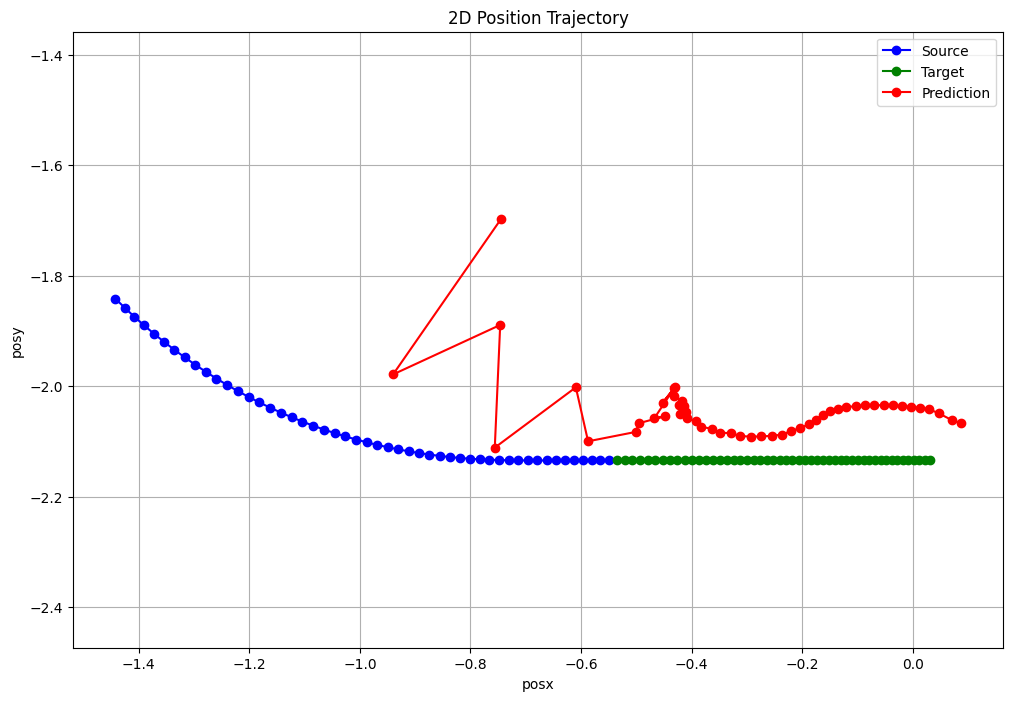

In [69]:
plot2D(w2, lstm_model, 'pos.x', 'pos.y')